In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
folder_results_lvad = '/media/maousi/Data/tmp/simulations_2020_03_21/results/'
folder_results_nolvad = '/media/maousi/Data/tmp/simulation_noLVAD_2020_04_15/results/'
filename_table = 'table.csv'
filename_exact = 'Xexact.csv'
filename_pred = 'Xpredicted.csv'

# Introduction

#### Aim

Format the results table and plot values generated by `test_dnnmodelevaluation.m` in order to assess the DNN prediction accuracy of parameters reflecting heart failure stage.

#### About data

The data generated by the script mentionned above was extracted from the simulations performed on the DNN test dataset (see the data flow below). The DNN predicts a set of 4 parameters that reflect the stage of heart failure based on the curves (Fourier coefficients) of aortic pressure and pulmonary artery pressure. The exact parameters were randomly sampled during the dataset generation from a physiological and pathological range of values. 

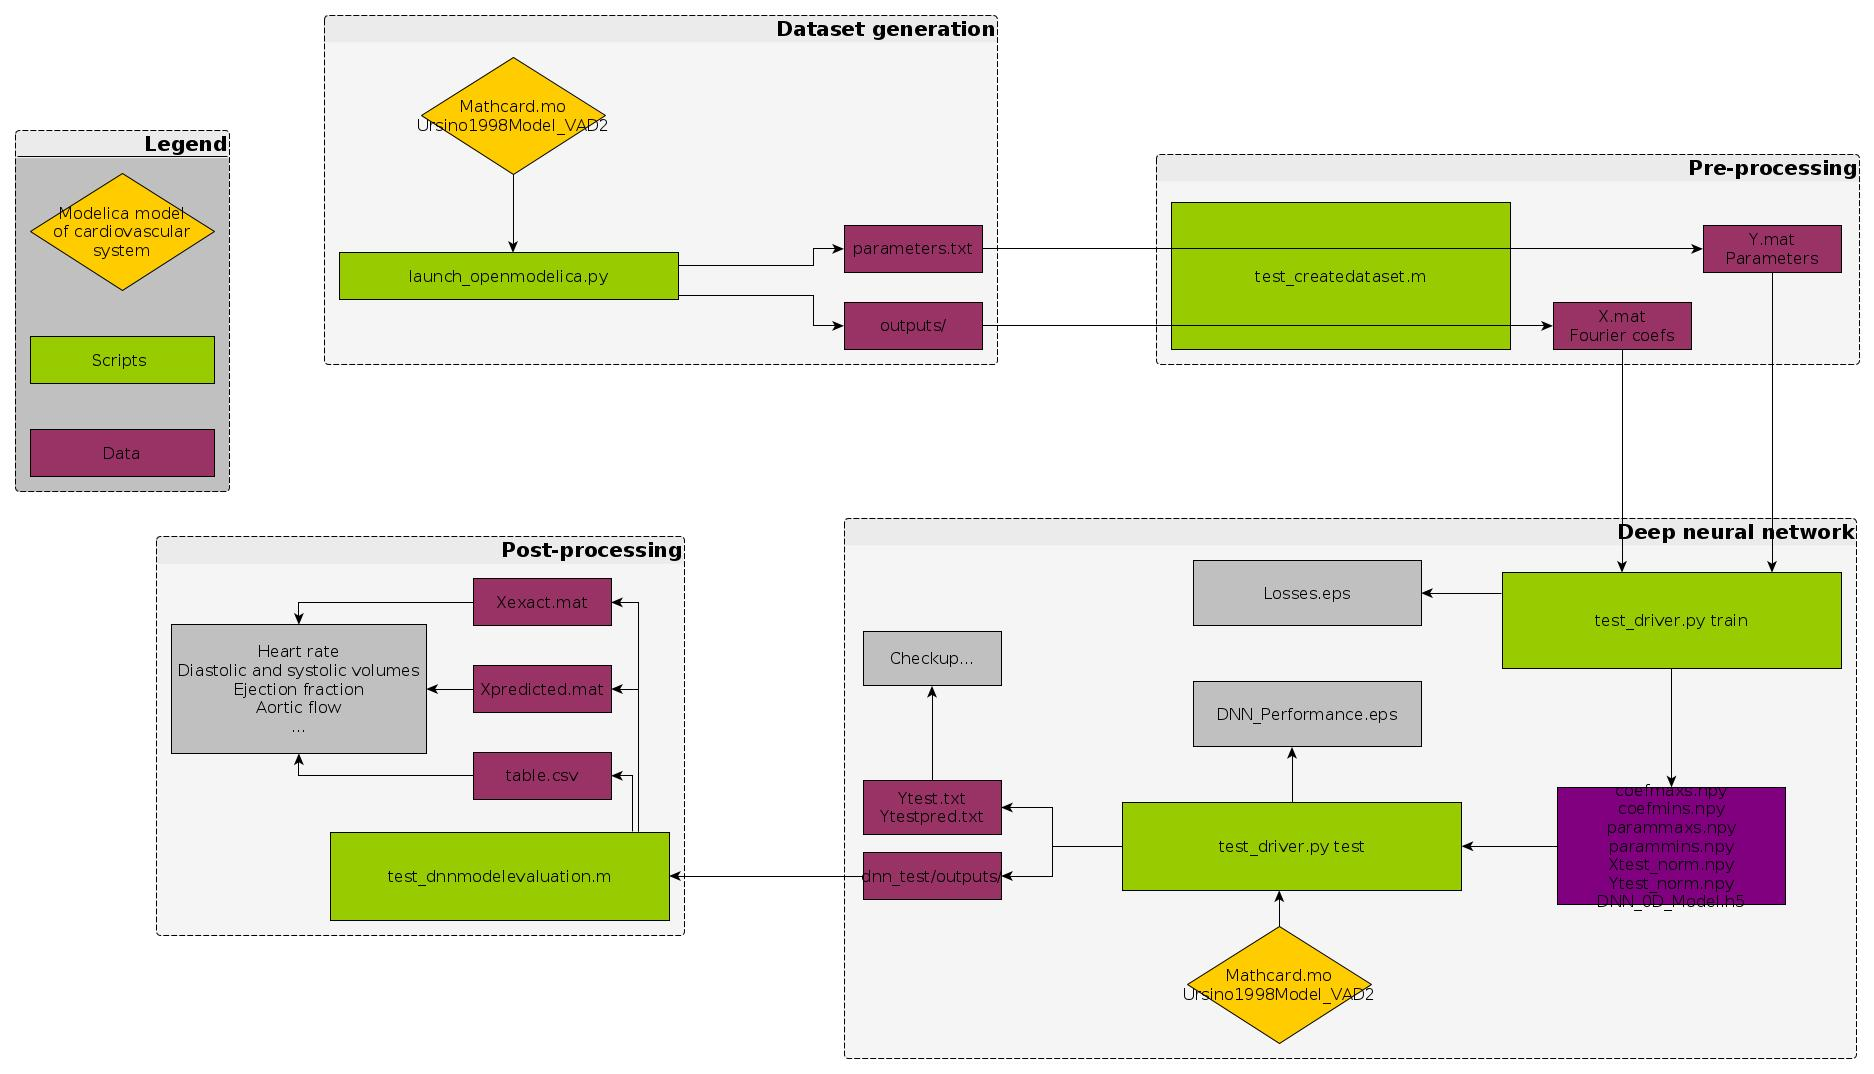

In [36]:
Image(filename='../res/diagram/data_flow.jpg') 

# Results 

## Simulation with LVAD

The DNN was made of 4 hidden layers of 16 neurons each.

### DNN performance


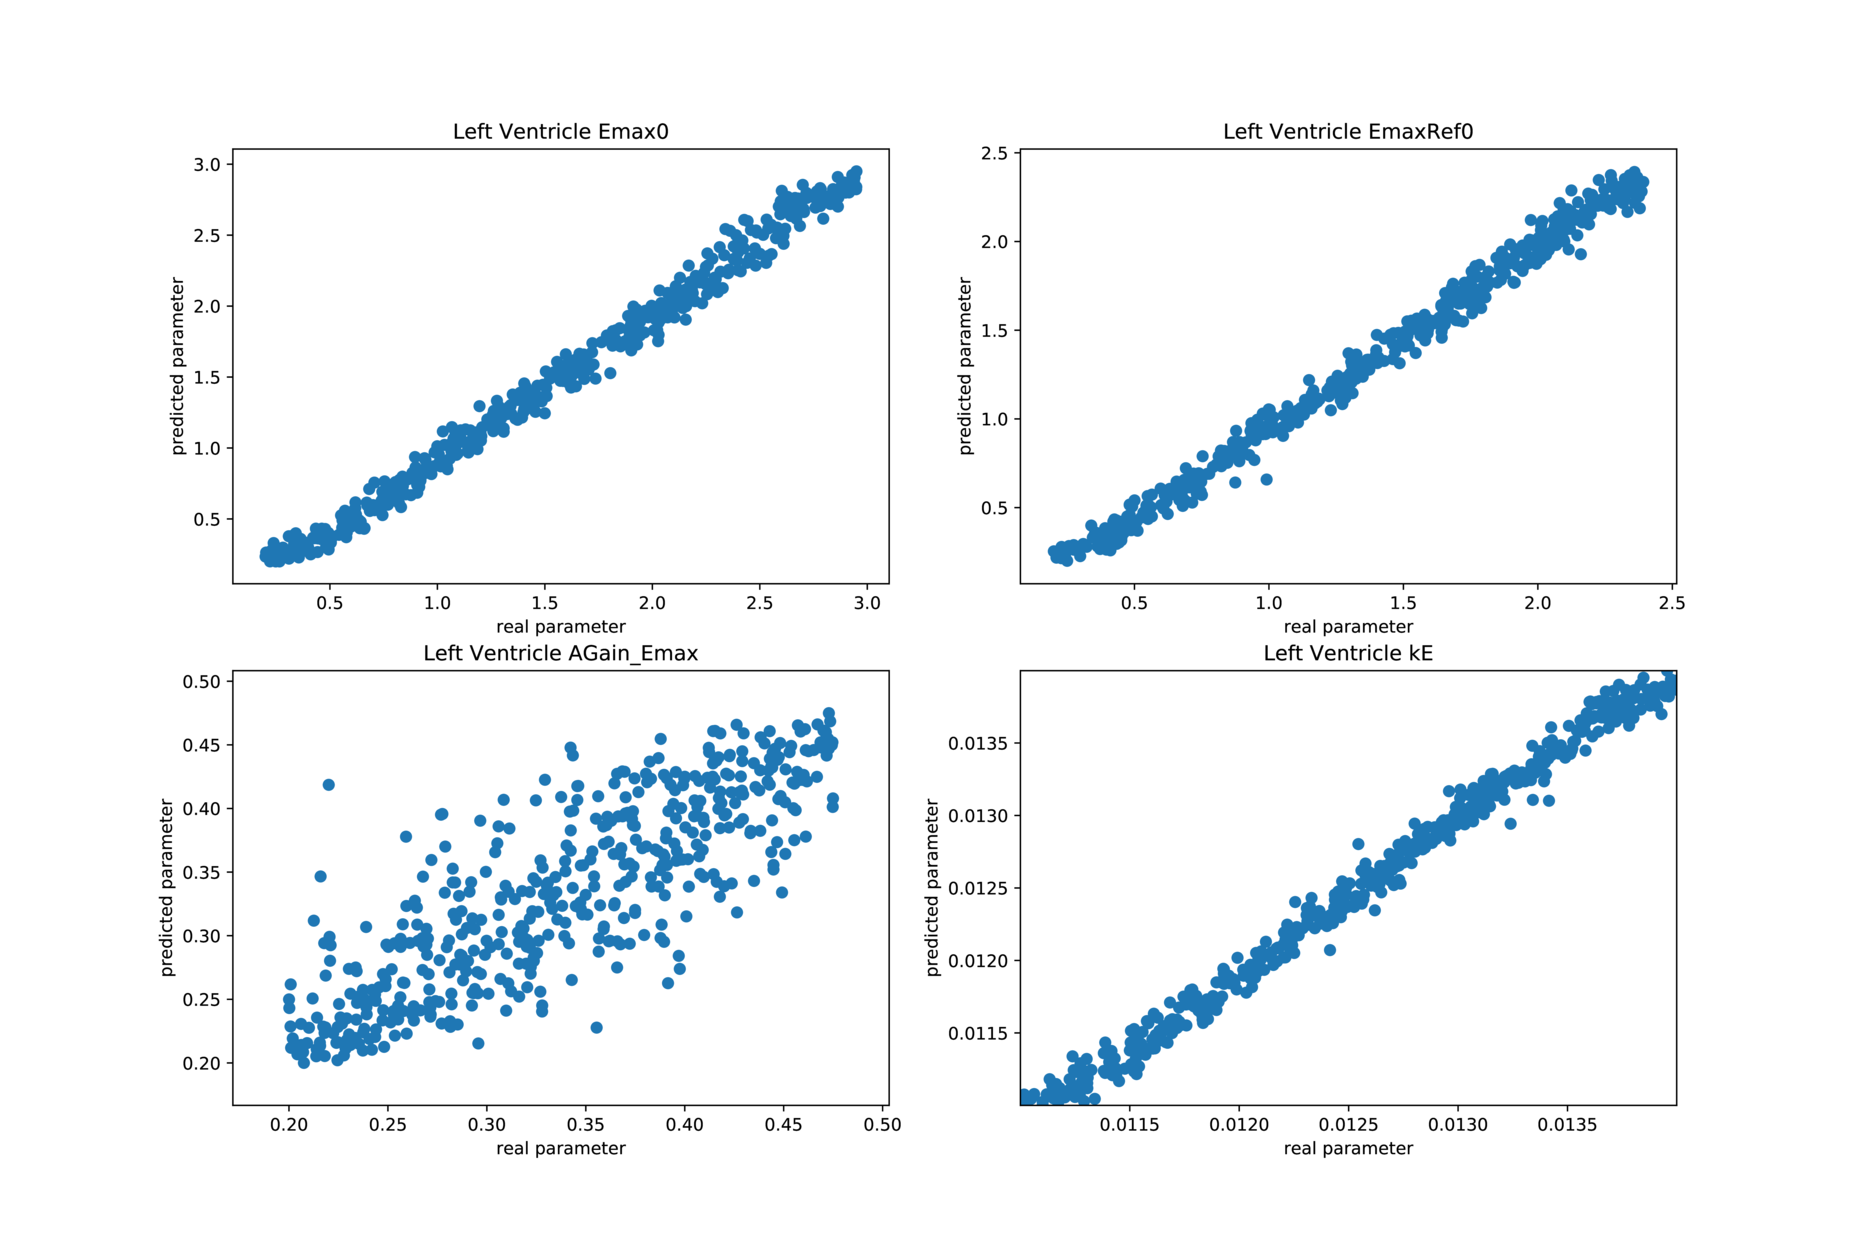

In [32]:
Image(filename='../res/results/DNN_Performance_LVAD.png') 

### Results table

In [3]:
table = pd.read_csv(folder_results_lvad+filename_table, header=None)

In [4]:
table.index = [
    'MinExact', 'MaxExact',
    'MeanExact', 'SDexact',
    'MinPredicted', 'MaxPredicted',
    'MeanPredicted', 'SDpredicted',
    'meanErrorMatrix', 'meanRelErrorMatrix',
    'SDErrorMatrix', 'CImin',
    'CImax',
]

In [5]:
table.columns = [
    'HR','SAPM','SAPS','SAPD',
    'PAPM','PAPS','PAPD','LVEF',
    'LVEDV', 'LVESV', 'CI', 'PCPW'
]

In [6]:
table

,HR,SAPM,SAPS,SAPD,PAPM,PAPS,PAPD,LVEF,LVEDV,LVESV,CI,PCPW
MinExact,60.000000,72.994916,88.169282,65.319460,16.167558,27.553985,10.452467,33.728397,134.311353,48.474868,0.834903,5.978053
MaxExact,78.947368,99.163091,134.783007,81.353133,22.391670,31.693980,17.740515,63.909469,200.817788,132.095610,2.369789,14.038923
MeanExact,66.687857,89.763473,119.940722,74.674848,18.419864,29.183576,13.038007,53.395894,157.197726,74.106947,-1.897265,9.000320
SDexact,3.865433,5.526449,9.690930,3.536806,1.187564,0.776559,1.396465,6.569052,14.552018,17.291430,0.317602,1.610692
MinPredicted,60.000000,72.692016,87.424039,64.026549,16.121521,27.508721,10.411572,32.870629,134.086403,48.260985,0.750296,5.932561
MaxPredicted,83.333333,99.344678,134.998585,81.517725,22.745452,31.950172,18.143092,64.476475,208.897021,139.544450,2.385694,14.630038
MeanPredicted,66.686390,89.785251,119.850060,74.752847,18.391502,29.162340,13.006084,53.496479,157.718186,74.350209,-1.888816,8.971188
SDpredicted,4.136988,6.012906,10.581937,3.834135,1.293819,0.849970,1.519878,7.129900,15.997469,19.032284,0.349825,1.750563
meanErrorMatrix,0.641425,0.564552,1.001906,0.404249,0.131355,0.109054,0.152901,0.711117,1.503086,1.808670,0.040282,0.167779
meanRelErrorMatrix,0.009549,0.006473,0.008803,0.005481,0.007064,0.003729,0.011573,0.014124,0.009140,0.022996,0.024387,0.018532


In [7]:
with open('result_table.csv', 'w') as f:
    f.write(table.to_csv())

## Simulation without LVAD

The same DNN was used, the only difference is the modelica file used to generate data. 

In [8]:
table_nolvad = pd.read_csv(folder_results_nolvad+filename_table, header=None)

In [9]:
table_nolvad.index = table.index
table_nolvad.columns = table.columns

In [10]:
table_nolvad

,HR,SAPM,SAPS,SAPD,PAPM,PAPS,PAPD,LVEF,LVEDV,LVESV,CI,PCPW
MinExact,60.000000,67.166406,89.253421,56.039291,16.353359,27.733218,10.658248,27.912097,140.061368,56.030788,1.744957,6.289320
MaxExact,83.333333,98.570334,135.834927,80.014382,24.050367,32.749575,19.700764,60.797103,210.313512,149.887116,3.080630,16.377122
MeanExact,65.608127,88.270853,120.429987,72.191286,18.823135,29.498019,13.485693,49.506433,163.908611,83.525222,-2.622349,9.627428
SDexact,3.995726,5.841561,9.516143,4.108603,1.322441,0.866023,1.553331,6.407753,14.136431,17.505955,0.284792,1.788037
MinPredicted,60.000000,64.098343,84.569244,52.891209,16.292710,27.690635,10.586929,25.451198,138.992217,55.353783,1.539708,6.177030
MaxPredicted,83.333333,98.905314,136.898400,80.359984,24.808381,33.360993,20.532075,61.190300,216.605388,156.348921,3.094293,17.389894
MeanPredicted,65.616418,88.379487,120.576965,72.280749,18.809122,29.484228,13.471570,49.860201,163.168305,82.641530,-2.624766,9.605949
SDpredicted,4.162424,6.244694,10.136735,4.411029,1.412826,0.930914,1.656759,6.717582,14.933891,18.347587,0.301117,1.908271
meanErrorMatrix,0.948101,0.505868,0.844746,0.375458,0.116884,0.102452,0.131027,0.596786,1.502820,1.644241,0.035610,0.153227
meanRelErrorMatrix,0.014376,0.005885,0.007247,0.005313,0.006117,0.003459,0.009519,0.012418,0.009090,0.019789,0.014135,0.015905


In [11]:
with open('result_table_nolvad.csv', 'w') as f:
    f.write(table_nolvad.to_csv())

# Raw data

## Load

In [12]:
# Load results of data with LVAD
# Exact
X = pd.read_csv(folder_results_lvad + filename_exact)
# Pred
Xhat = pd.read_csv(folder_results_lvad + filename_pred)

In [13]:
cols = [
    'HR','SAPM','SAPS','SAPD',
    'PAPM','PAPS','PAPD','LVEF',
    'LVEDV', 'LVESV', 'CI', 'PCPW'
]
X.columns = cols
Xhat.columns = cols

In [14]:
X.head(5)

,HR,SAPM,SAPS,SAPD,PAPM,PAPS,PAPD,LVEF,LVEDV,LVESV,CI,PCPW
0,62.500000,94.702502,126.595962,78.755773,16.719180,27.999919,11.078811,57.531861,158.079150,67.133273,-2.105697,6.903985
1,65.217391,92.609776,126.435978,75.696675,18.193093,29.000448,12.789416,54.782405,149.250685,67.487571,-2.197750,8.477912
2,62.500000,93.788953,126.441664,77.462598,17.356856,28.540265,11.765151,58.570209,148.720360,61.614534,-2.050838,7.613565
3,62.500000,94.978545,128.960053,77.987791,17.525749,28.486615,12.045316,53.208741,162.688402,76.123951,-2.205449,7.511583
4,62.500000,94.284163,129.071605,76.890443,17.937245,28.883103,12.464317,58.953981,141.170588,57.944907,-2.108881,8.070442


## Apply relevant transformations

We want a positive value for the cardiac index.

In [15]:
X.CI = X.CI.apply(np.abs)
Xhat.CI = Xhat.CI.apply(np.abs)

## Concatenate predicted and exact data

This will be more convenient to plot with `seaborn`.

In [16]:
data = X.join(Xhat, rsuffix='_hat')

# Plots

## Predicted vs exact values


In [17]:
def plt_var(data, col, ax):
    # Plot identity line
    coord1 = min(data[col].min(), data[col+'_hat'].min())
    coord2 = max(data[col].max(), data[col+'_hat'].max())
    ax.plot([coord1, coord2], [coord1, coord2], '--k')
    # Scatter plot predicted vs exact
    sns.scatterplot(x=col, y=col+'_hat', data=data, ax=ax)

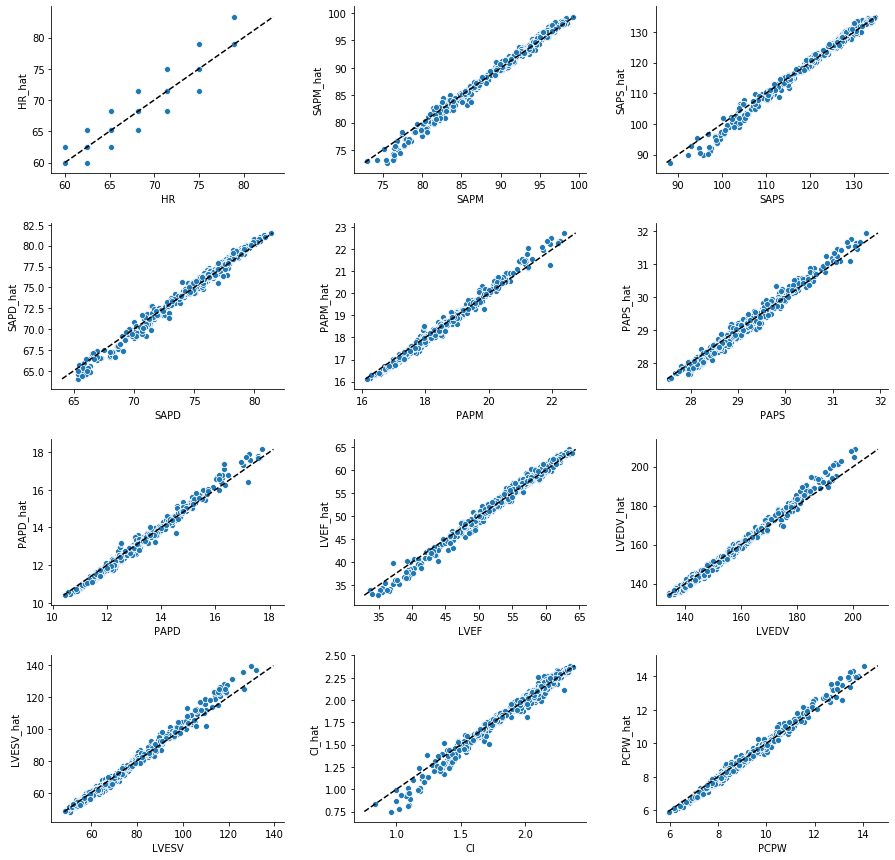

In [18]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
axlst = ax.ravel()

for i, col in enumerate(cols):
    plt_var(data, col, axlst[i])
plt.subplots_adjust(wspace=.3, hspace=.3)
sns.despine()

# Comparison - Simulation without LVAD



In [19]:
X = pd.read_csv(folder_results_nolvad + filename_exact)
Xhat = pd.read_csv(folder_results_nolvad + filename_pred)

In [20]:
X.columns = cols
Xhat.columns = cols

In [21]:
X.CI = X.CI.apply(np.abs)
Xhat.CI = Xhat.CI.apply(np.abs)

In [22]:
data_nolvad = X.join(Xhat, rsuffix='_hat')

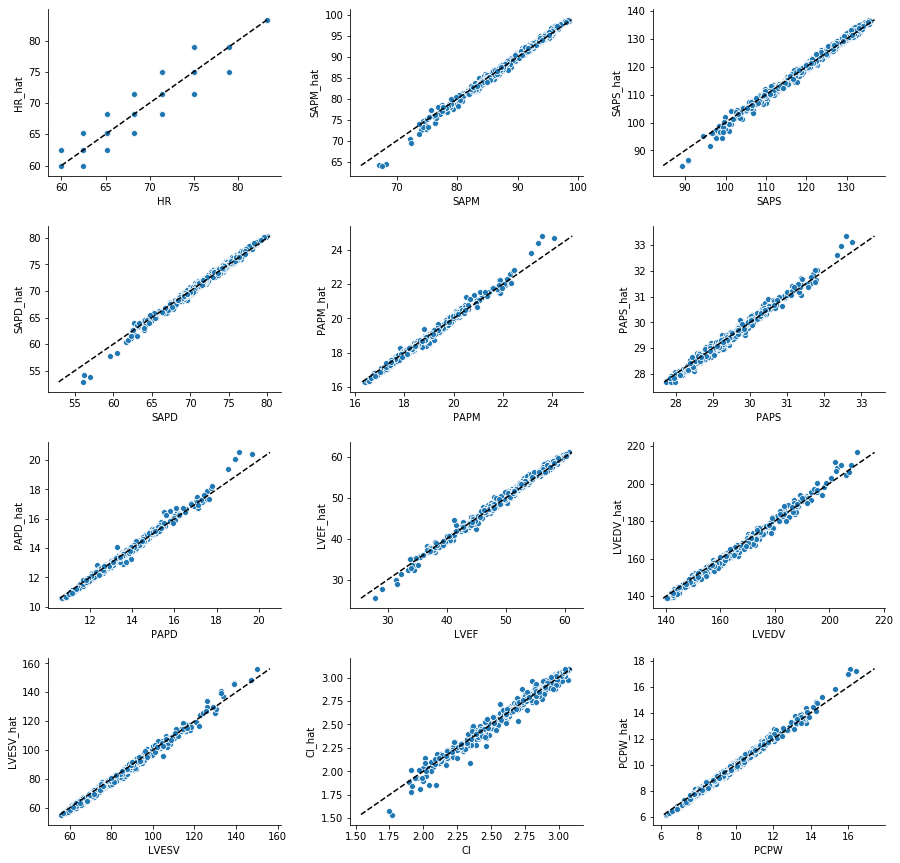

In [23]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
axlst = ax.ravel()

for i, col in enumerate(cols):
    plt_var(data_nolvad, col, axlst[i])
plt.subplots_adjust(wspace=.3, hspace=.3)
sns.despine()

## Superposed plot

In [24]:
# Merge
data['LVAD'] = True
data_nolvad['LVAD'] = False

In [25]:
df = pd.concat([data, data_nolvad])

In [26]:
def plt_compare(data, col, ax, legend=None):
    # Plot identity line
    coord1 = min(data[col].min(), data[col+'_hat'].min())
    coord2 = max(data[col].max(), data[col+'_hat'].max())
    ax.plot([coord1, coord2], [coord1, coord2], '--k')
    # Scatter plot predicted vs exact
    sns.scatterplot(x=col, y=col+'_hat', data=data, ax=ax, hue='LVAD', legend=legend)

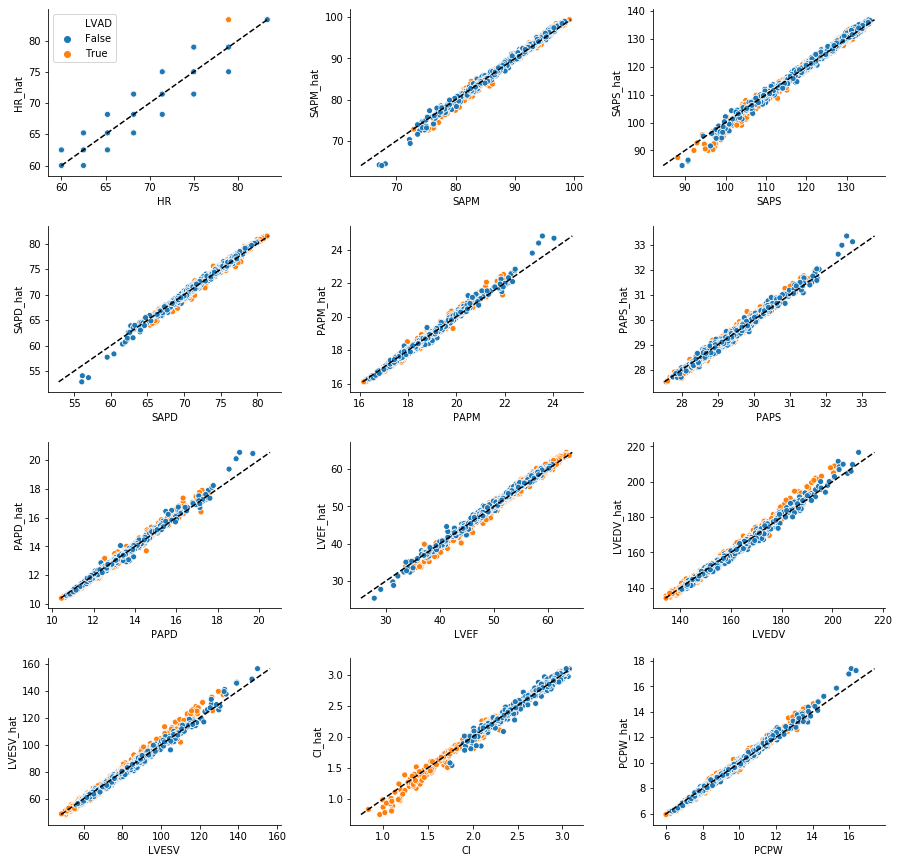

In [27]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
axlst = ax.ravel()

for i, col in enumerate(cols):
    plt_compare(df, col, axlst[i], 'full' if i == 0 else None)
plt.subplots_adjust(wspace=.3, hspace=.3)
sns.despine()